# W4 Assignment: Data Exploration

- In your Jupyter notebook report, complete the following:

    1. Document data context and data sampling in markdown
    2. Explore and interpret data structure, descriptive statistics, data quality, and variable relationships
    3. Explore data visually with appropriate visualizations
    4. Discuss and implement strategies for Handling Missing Values, Removing Duplicates, and Handling Outliers
    5. Perform data transformation as appropriate
    6. Create at least one new feature and document your approach
    7. Perform a dimensionality reduction method on the data and discuss
    8. Include a discussion around data quality assessment, including data profiling, data completeness, data accuracy, data consistency, data integrity, and data lineage and provenance

### Our team's foucs: Detecting Early Signs of COVID-19 Infection Using HRV Data
- Investigate whether changes in an individual's HRV patterns can predict the onset of COVID-19 symptoms. The goal is to determine if there are specific shifts in HRV metrics (such as a drop in variability or a rise in resting heart rate) that occur in the early stages of infection, even before noticeable symptoms appear.
- Source: https://github.com/Welltory/hrv-covid19/tree/master/data

### Exploring Data - hrv_measurement.csv, participants.csv

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
hrv_df = pd.read_csv('https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/hrv_measurements.csv')
participants_df = pd.read_csv('https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/participants.csv')

print(hrv_df.head())
print(hrv_df.describe())
print(hrv_df.info())

print(participants_df.head())
print(participants_df.describe())
print(participants_df.info())


    user_code     rr_code measurement_datetime time_of_day  bpm  meanrr  \
0  007b8190cf  10489a6aea  2020-04-21 21:23:08     morning   75  795.90   
1  007b8190cf  9610d4d4dc  2020-04-26 11:19:25     morning   70  858.00   
2  013f6d3e5b  f3de056155  2020-05-15 04:14:21       night   83  724.10   
3  013f6d3e5b  b04489e32f  2020-05-19 03:06:02       night   75  802.64   
4  01bad5a519  ac52c706c6  2019-12-31 09:07:43     morning   78  768.07   

   mxdmn    sdnn   rmssd  pnn50  ...     lf      hf     vlf   lfhf  \
0   0.12  45.802  54.174  15.15  ...  508.0  1076.0   267.0  0.472   
1   0.11  32.889  33.022  16.16  ...  409.0   310.0   176.0  1.319   
2   0.17  54.811  65.987  17.17  ...  432.0   881.0   194.0  0.490   
3   0.20  72.223  70.039  22.22  ...  814.0  1487.0  1719.0  0.547   
4   0.10  29.650  21.196   4.04  ...  489.0   128.0    96.0  3.820   

   total_power  how_feel  how_mood  how_sleep  \
0       1851.0         0        -1        NaN   
1        895.0         0      

## Observation
#### 1. Missing Value
hrv_measurement.csv: Both columns's Non-Null Counts should be 3245, but they have data missing.
- Column 19:  how_sleep  /  1466  /     non-null    /    float64
- Column 20:  tags       / 2201   /     non-null    /    object 

participant.csv: The column count should be 185; however, a portion of the data is absent. We utilize specific data regarding the onset of symptoms in order to exclusively concentrate on said data.
- Column 7:   symptoms_onset   /   147   /    non-null   /   object 

#### 2. Duplicate

In [34]:
dup_check_hrv = hrv_df[hrv_df.duplicated()].shape[0]
dup_check_participants = participants_df[participants_df.duplicated()].shape[0]

print("Checking duplicate in drv_measurement.csv: ", dup_check_hrv)
print("Checking duplicate in participants.csv: ", dup_check_participants)

Checking duplicate in drv_measurement.csv:  0
Checking duplicate in participants.csv:  0


#### 3. Wrong symptoms_onset setting
- Some of the dates for symptoms_onset are incorrect. (e.g. July 7, 1987) It appears that they left their BOD here.
- Our solution: Remove that participant's data

In [35]:
participants_df.drop(columns=['city', 'country', 'height', 'weight'], inplace=True)
participants_df.dropna(inplace=True)
participants_df['symptoms_onset'] = pd.to_datetime(participants_df['symptoms_onset'])
participants_df = participants_df[participants_df['symptoms_onset'] >= '2020-01-01']

print(participants_df.shape)

(136, 4)


#### 4. Variable Relationship


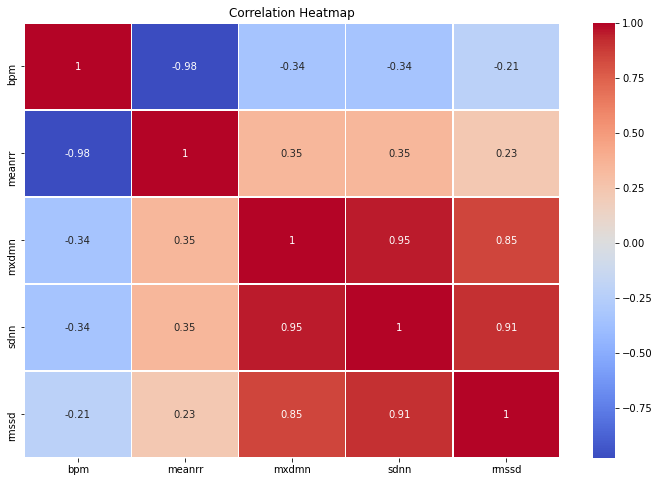

In [39]:
plt.figure(figsize=(12,8))
correlation_matrix = hrv_df[['bpm', 'meanrr', 'mxdmn', 'sdnn', 'rmssd']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.6)
plt.title('Correlation Heatmap')
plt.show()

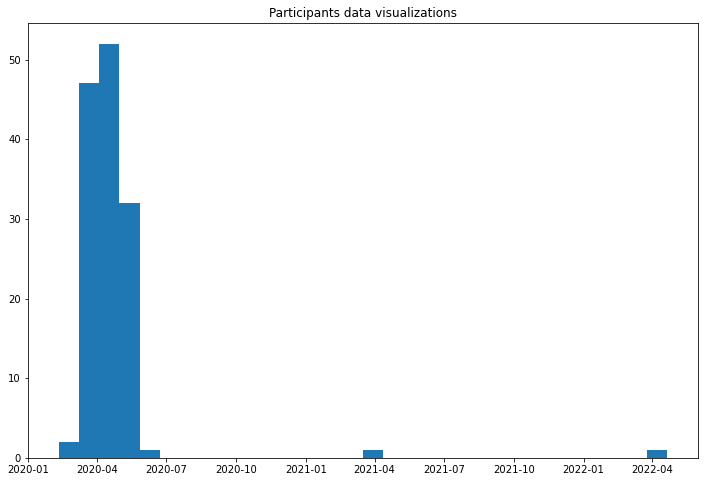

In [41]:
plt.figure(figsize=(12, 8))
plt.hist(data=participants_df, x='symptoms_onset', bins=30)
plt.title('Participants data visualizations')
plt.show()

### Handling Outliers

In [42]:
Q1 = hrv_df['bpm'].quantile(0.25)
Q3 = hrv_df['bpm'].quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

hrv_df = hrv_df[(hrv_df['bpm'] >= lower_bound) & (hrv_df['bpm'] <= upper_bound)]
print(hrv_df.shape[0])

3220


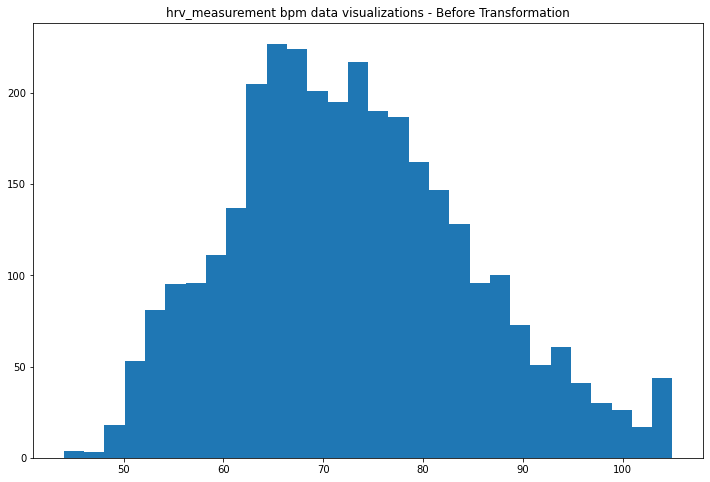

In [44]:
plt.figure(figsize=(12, 8))
plt.hist(data=hrv_df, x='bpm', bins=30)
plt.title('hrv_measurement bpm data visualizations - Before Transformation')
plt.show()

##### Description of histogram: It has long-tail to the right(right skewed)

### Data Transformation

<ipython-input-45-4e2e823e9c2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hrv_df['bpm'] = np.log1p(hrv_df['bpm'])


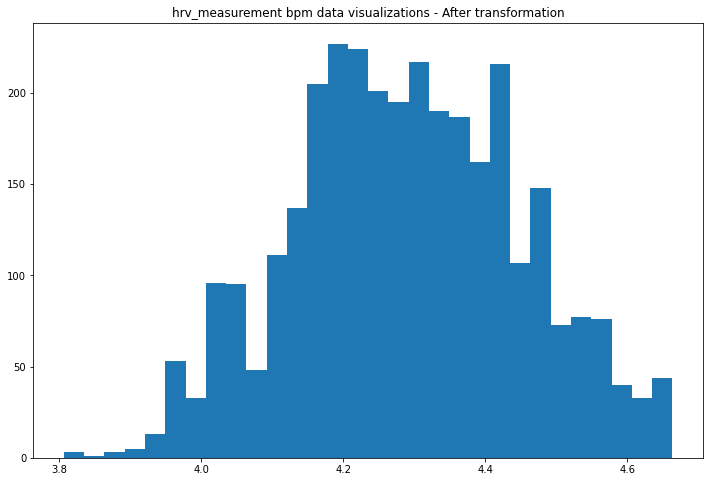

In [45]:
hrv_df['bpm'] = np.log1p(hrv_df['bpm'])

plt.figure(figsize=(12, 8))
plt.hist(data=hrv_df, x='bpm', bins=30)
plt.title('hrv_measurement bpm data visualizations - After transformation')
plt.show()
